### Airfoil self-noise prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### About the data  
Predict Airfoil self-noise using ML
ing
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

you have to predict the output with the given inputs.

## Load Data

In [3]:
df = pd.read_excel(r"/content/Book1.xlsx", names=['Frequency','AOA', 'CL', 'VFSV', 'T','PL'], header=None)
df

,Frequency,AOA,CL,VFSV,T,PL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### Explore the data  

**Instructions**

- you will see the head of the data.
- you will see the shape of the data.
- you will see the information using .info and .describe  
- Check for the missing values present in the data.  
- See the relations between the features. Hint [ Use .hist with data ]


In [4]:
head_of_the_data = df.head()#head of the data.
head_of_the_data

,Frequency,AOA,CL,VFSV,T,PL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
shape_of_the_data = df.shape
#shape of the data
shape_of_the_data

(1503, 6)

In [6]:
#information using .info and .describe
information_about_the_data_using_info = df.info()
information_about_the_data_using_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  1503 non-null   int64  
 1   AOA        1503 non-null   float64
 2   CL         1503 non-null   float64
 3   VFSV       1503 non-null   float64
 4   T          1503 non-null   float64
 5   PL         1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
information_about_the_data_using_describe = df.describe()
information_about_the_data_using_describe

,Frequency,AOA,CL,VFSV,T,PL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
missing_values = df.isna()#checking for  missing values
missing_values

,Frequency,AOA,CL,VFSV,T,PL
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1498,False,False,False,False,False,False
1499,False,False,False,False,False,False
1500,False,False,False,False,False,False
1501,False,False,False,False,False,False


In [9]:
missing_values = df.isnull()#checking for  missing values
missing_values

,Frequency,AOA,CL,VFSV,T,PL
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1498,False,False,False,False,False,False
1499,False,False,False,False,False,False
1500,False,False,False,False,False,False
1501,False,False,False,False,False,False


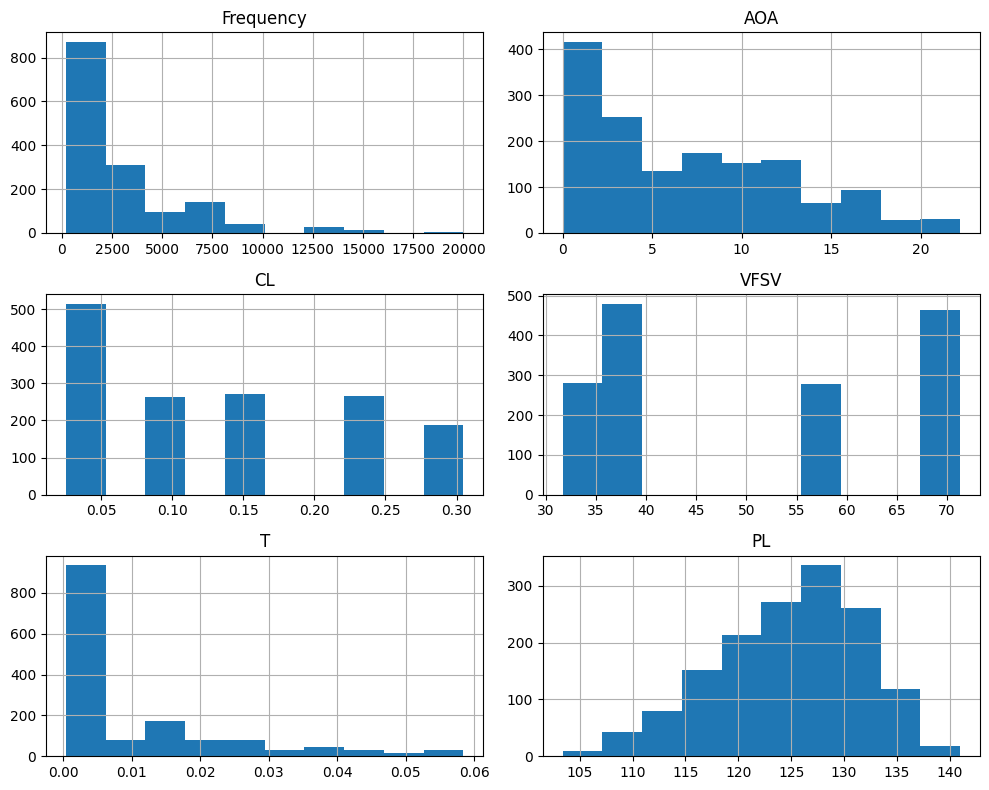

In [10]:
# To find out the relation between the features
features_relations =df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [11]:
corr_matrix =df.corr() # correlations
corr_matrix

,Frequency,AOA,CL,VFSV,T,PL
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AOA,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
CL,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
VFSV,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
T,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
PL,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [12]:
corr_matrix["PL"].sort_values(ascending=False)

PL           1.000000
VFSV         0.125103
AOA         -0.156108
CL          -0.236162
T           -0.312670
Frequency   -0.390711
Name: PL, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation for eg(sound pressure tends to go up when Free-stream velocity increases) and this is opposite for negative correlation with respect to Scaled sound pressure level.

### Divide the Data

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X

,Frequency,AOA,CL,VFSV,T
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [15]:
#### use the train_test_split function, with test_size = 0.1, random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, test_size=0.1, random_state=0, shuffle=True)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1352, 5), (151, 5), (1352,), (151,))

# Testing different models
 1. linear Regression.
 2. Lasso
 3. Ridge
 4. Decision Tree
 5. Random Forest
 6. Gradient Boosting
 7. Support vector
 8. KNN
 9. XGBoost


In [17]:
#pip install xgboost

In [18]:
#### MAKE AN LINEAR REGRESSION OBJECT AND FIT THE MODEL USING "X_train", "y_train"
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}


# Train models and calculate MAE
mae_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mae_results[name] = mae

# Create DataFrame for results
results_df = pd.DataFrame(list(mae_results.items()), columns=['Model', 'Mean Absolute Error'])

# Display results
print(results_df)


                   Model  Mean Absolute Error
0      Linear Regression             3.370977
1       Ridge Regression             3.557060
2       Lasso Regression             4.462804
3  ElasticNet Regression             4.463889
4          Decision Tree             1.730682
5          Random Forest             1.244986
6      Gradient Boosting             2.036446
7                    SVR             4.774795
8                    KNN             4.568433
9                XGBoost             1.021568


## Testing with different variations of each model

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}


# Define hyperparameter grids for each model
models_grid = {

    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.1, 0.5, 1.0]},
    "Lasso Regression": {"alpha": [0.1, 0.5, 1.0]},
    "ElasticNet Regression": {"alpha": [0.1, 0.5, 1.0], "l1_ratio": [0.1, 0.5, 0.9]},
    "Decision Tree": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]},

    "SVR":{"kernel": ['rbf',  'sigmoid'],"C": [0.1, 1, 10],"gamma": ['scale', 'auto'], "coef0": [0.0, 1.0], "epsilon": [0.1, 0.2, 0.5] },
    "KNN": {"n_neighbors": list(range(5, 11)), "weights": ['uniform', 'distance']},
     "XGBoost": {"n_estimators": [100, 200,1000], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]}
}






# Create an empty list to store results
results = []

# Train and evaluate models with variations
for name, params_dict in models_grid.items():
    #print(name,params_dict)
    #no_of_params =len(params_dict)
    # Get keys and values from param_grid_rf
    param_keys = list(params_dict.keys())
    param_values = list(params_dict.values())

    #print("The param_Values", param_values)

    # Generate all combinations of hyperparameters
    import itertools
    param_combinations = list(itertools.product(*param_values))
    #print(param_combinations)
    # Train and evaluate models with variations
    for params in param_combinations:
        # Set hyperparameters
        hyperparameters = {param_keys[i]: params[i] for i in range(len(param_keys))}
        #print(hyperparameters)
        models[name].set_params(**hyperparameters)
        # Train the model
        models[name].fit(X_train, y_train)
        # Make predictions
        pred = models[name].predict(X_test)
        # Calculate MAE
        mae = mean_absolute_error(y_test, pred)
        # Store results in a dictionary
        result = {'Model':name, 'Hyperparameters': hyperparameters, 'Mean Absolute Error': mae}
        # Append dictionary to the results list
        #print(model,mae)
        results.append(result)

# Create DataFrame from the results list
results_df = pd.DataFrame(results)

# Display
display(results_df)


,Model,Hyperparameters,Mean Absolute Error
0,Linear Regression,{},3.370977
1,Ridge Regression,{'alpha': 0.1},3.432014
2,Ridge Regression,{'alpha': 0.5},3.515275
3,Ridge Regression,{'alpha': 1.0},3.557060
4,Lasso Regression,{'alpha': 0.1},3.767139
...,...,...,...
152,XGBoost,"{'n_estimators': 1000, 'learning_rate': 0.01, ...",1.399437
153,XGBoost,"{'n_estimators': 1000, 'learning_rate': 0.1, '...",1.367250
154,XGBoost,"{'n_estimators': 1000, 'learning_rate': 0.1, '...",0.931935
155,XGBoost,"{'n_estimators': 1000, 'learning_rate': 0.5, '...",1.033400


## Finding best model with different variations of each model

In [25]:
# Create an empty dictionary to store best results for each model
best_results = {}

# Train and evaluate models with variations
for name, params_dict in models_grid.items():
    no_of_params = len(params_dict)
    # Get keys and values from param_grid_rf
    param_keys = list(params_dict.keys())
    param_values = list(params_dict.values())

    # Generate all combinations of hyperparameters
    import itertools
    param_combinations = list(itertools.product(*param_values))

    # Initialize best MAE for the model
    best_mae = float('inf')  # Initialize with a very large value

    # Initialize best hyperparameters for the model
    best_hyperparameters = None

    # Train and evaluate models with variations
    for params in param_combinations:
        # Set hyperparameters
        hyperparameters = {param_keys[i]: params[i] for i in range(len(param_keys))}
        models[name].set_params(**hyperparameters)
        # Train the model
        models[name].fit(X_train, y_train)
        # Make predictions
        pred = models[name].predict(X_test)
        # Calculate MAE
        mae = mean_absolute_error(y_test, pred)
        # Check if current MAE is better than the previous best
        if mae < best_mae:
            # Update best MAE and hyperparameters
            best_mae = mae
            best_hyperparameters = hyperparameters

    # Store the best results for the model
    best_results[name] = {'Model': name, 'Hyperparameters': best_hyperparameters, 'Mean Absolute Error': best_mae}

# Create DataFrame from the best results dictionary
best_results_df = pd.DataFrame(list(best_results.values()))

# Display
display(best_results_df)


,Model,Hyperparameters,Mean Absolute Error
0,Linear Regression,{},3.370977
1,Ridge Regression,{'alpha': 0.1},3.432014
2,Lasso Regression,{'alpha': 0.1},3.767139
3,ElasticNet Regression,"{'alpha': 0.1, 'l1_ratio': 0.9}",4.135003
4,Decision Tree,"{'max_depth': None, 'min_samples_split': 2}",1.790192
5,Random Forest,"{'n_estimators': 200, 'max_depth': None, 'min_...",1.242887
6,Gradient Boosting,"{'n_estimators': 200, 'learning_rate': 0.5, 'm...",1.017910
7,SVR,"{'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale', ...",4.753689
8,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",4.568433
9,XGBoost,"{'n_estimators': 1000, 'learning_rate': 0.1, '...",0.931935


## Finding best model with different variations of each model [Using Grid Search]

In [26]:
from sklearn.model_selection import GridSearchCV

# Create an empty list to store results
results = []

# Train and evaluate models with variations
for name, model in models.items():
    if name in models_grid:
        # Get the parameter grid for the model
        param_grid = models_grid[name]

        # Create Grid Search object
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

        # Perform Grid Search
        grid_search.fit(X_train, y_train)

        # Get the best model and its hyperparameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Use the best model to make predictions
        pred = best_model.predict(X_test)

        # Calculate MAE
        mae = mean_absolute_error(y_test, pred)

        # Store results in a dictionary
        result = {'Model': name, 'Hyperparameters': best_params, 'Mean Absolute Error': mae}

        # Append dictionary to the results list
        results.append(result)

# Create DataFrame from the results list
results_df = pd.DataFrame(results)

# Display
display(results_df)


,Model,Hyperparameters,Mean Absolute Error
0,Linear Regression,{},3.370977
1,Ridge Regression,{'alpha': 0.1},3.432014
2,Lasso Regression,{'alpha': 0.1},3.767139
3,ElasticNet Regression,"{'alpha': 0.1, 'l1_ratio': 0.9}",4.135003
4,Decision Tree,"{'max_depth': None, 'min_samples_split': 2}",1.851629
5,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",1.249036
6,Gradient Boosting,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",1.016009
7,SVR,"{'C': 10, 'coef0': 0.0, 'epsilon': 0.2, 'gamma...",4.759605
8,KNN,"{'n_neighbors': 10, 'weights': 'uniform'}",4.739235
9,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.931935


## References

Thanks to **Ayush Singh** Founder of - <a href="https://www.youtube.com/channel/UC_sl8H2k4xC9RLqyHsnDkcA" target="_blank">Newera</a> YT channel. This is part of one of the assignments in ML course.

To understand some terms used here: https://www.youtube.com/watch?v=6wgrDBa-AXo

Dataset: https://archive.ics.uci.edu/dataset/291/airfoil+self+noise
